This notebook generates a few diagrams for use in the DOE network telemetry research proposal

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy  as np

import foa

( G , pos ) = foa.importCSV('esnet6_proposed_footprint.txt')

In [2]:
dijkstra_source = 'BNL-1'
paths_from_dijkstra = nx.single_source_dijkstra_path(G,dijkstra_source,weight='impedance')
dijkstra_dest = 'LBNL'
aPath = paths_from_dijkstra[dijkstra_dest]
dijkstra_edges = list(zip(aPath,aPath[1:]))

In [3]:
flow_sources = ['BNL-1']
flow_dests   = ['LBNL']
(all_flows_pd , all_flows , all_flow_rates ,all_flow_rates_pd ) = foa.computeMaxFlows( G , 
                                                                        flow_sources = flow_sources , 
                                                                        flow_dests = flow_dests );

flow_edges = list(all_flows_pd.index.values)

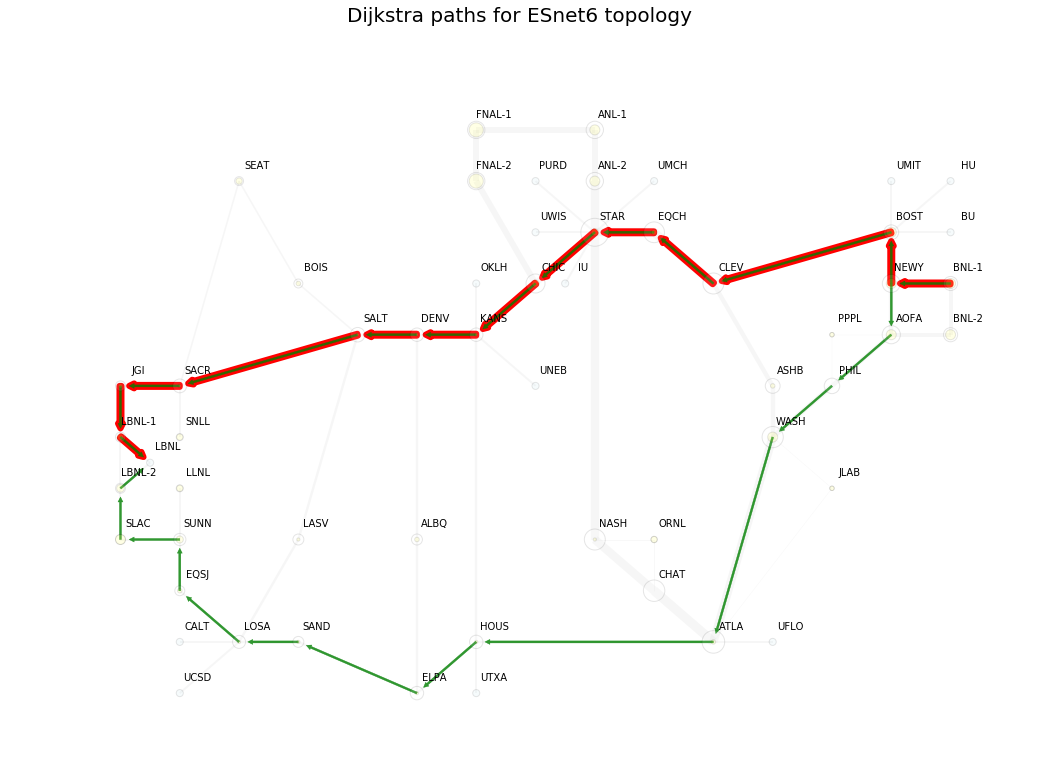

In [5]:
fig = plt.figure(figsize=(18,12))
plt.axis('off')

foa.drawBaseMap(G  , pos=pos , node_color='yellow' , arrows=False , alpha=0.1 , edges=True , labels=False)

foa.highlightEdges(G , pos=pos , edgelist=dijkstra_edges , edge_color='red'   , font_weight='bold' , rate=1.5 , alpha=1, labels=False) 
foa.highlightEdges(G , pos=pos , edgelist=flow_edges     , edge_color='green' , alpha=0.8 , labels=False)

fig.suptitle('Dijkstra paths for ESnet6 topology', fontsize=20)

plt.show()